<a href="https://colab.research.google.com/github/Jiadia22/2026_SKT_AI_Challenger/blob/main/lr_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 - 자동차연비 데이터

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import random

SEED = 42

random.seed(SEED)
np.random.seed(SEED)

In [ ]:
np.set_printoptions(precision=4,linewidth=200)

## 데이터준비

###데이터 로딩

In [ ]:
!unzip auto+mpg.zip -d data

Archive:  auto+mpg.zip
  inflating: data/Index              
  inflating: data/auto-mpg.data      
  inflating: data/auto-mpg.data-original  
  inflating: data/auto-mpg.names     


In [ ]:
column_names = ['mpg','cylinders','displacement','horsepower', 'weight', 'acceleration', 'model_yea', 'origin', 'car_name']

In [ ]:
df = pd.read_csv("/content/data/auto-mpg.data", names=column_names, na_values=["?","-"], sep=r'\s+')
df.shape

(398, 9)

In [ ]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_yea,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


##EDA

In [ ]:
df.info() # housepower에서 물음표 6개 있었고 float로 돌아옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_yea     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [ ]:
df["horsepower"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,  95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,  nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,
        76.,  65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98.,
       115.,  53.,  81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,  84.,  64.,  74., 116.,  82.])

In [ ]:
df.describe().T # 평균, 최대, 최소 많이 봄, 타켓은 mpg

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_yea,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


### 타켓값


<Axes: xlabel='mpg', ylabel='Count'>

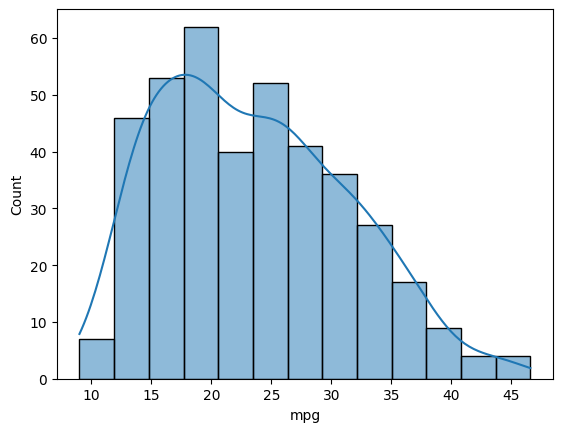

In [ ]:
sns.histplot(data=df,x='mpg',kde=True)

###결측치

In [ ]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_yea,0
origin,0
car_name,0


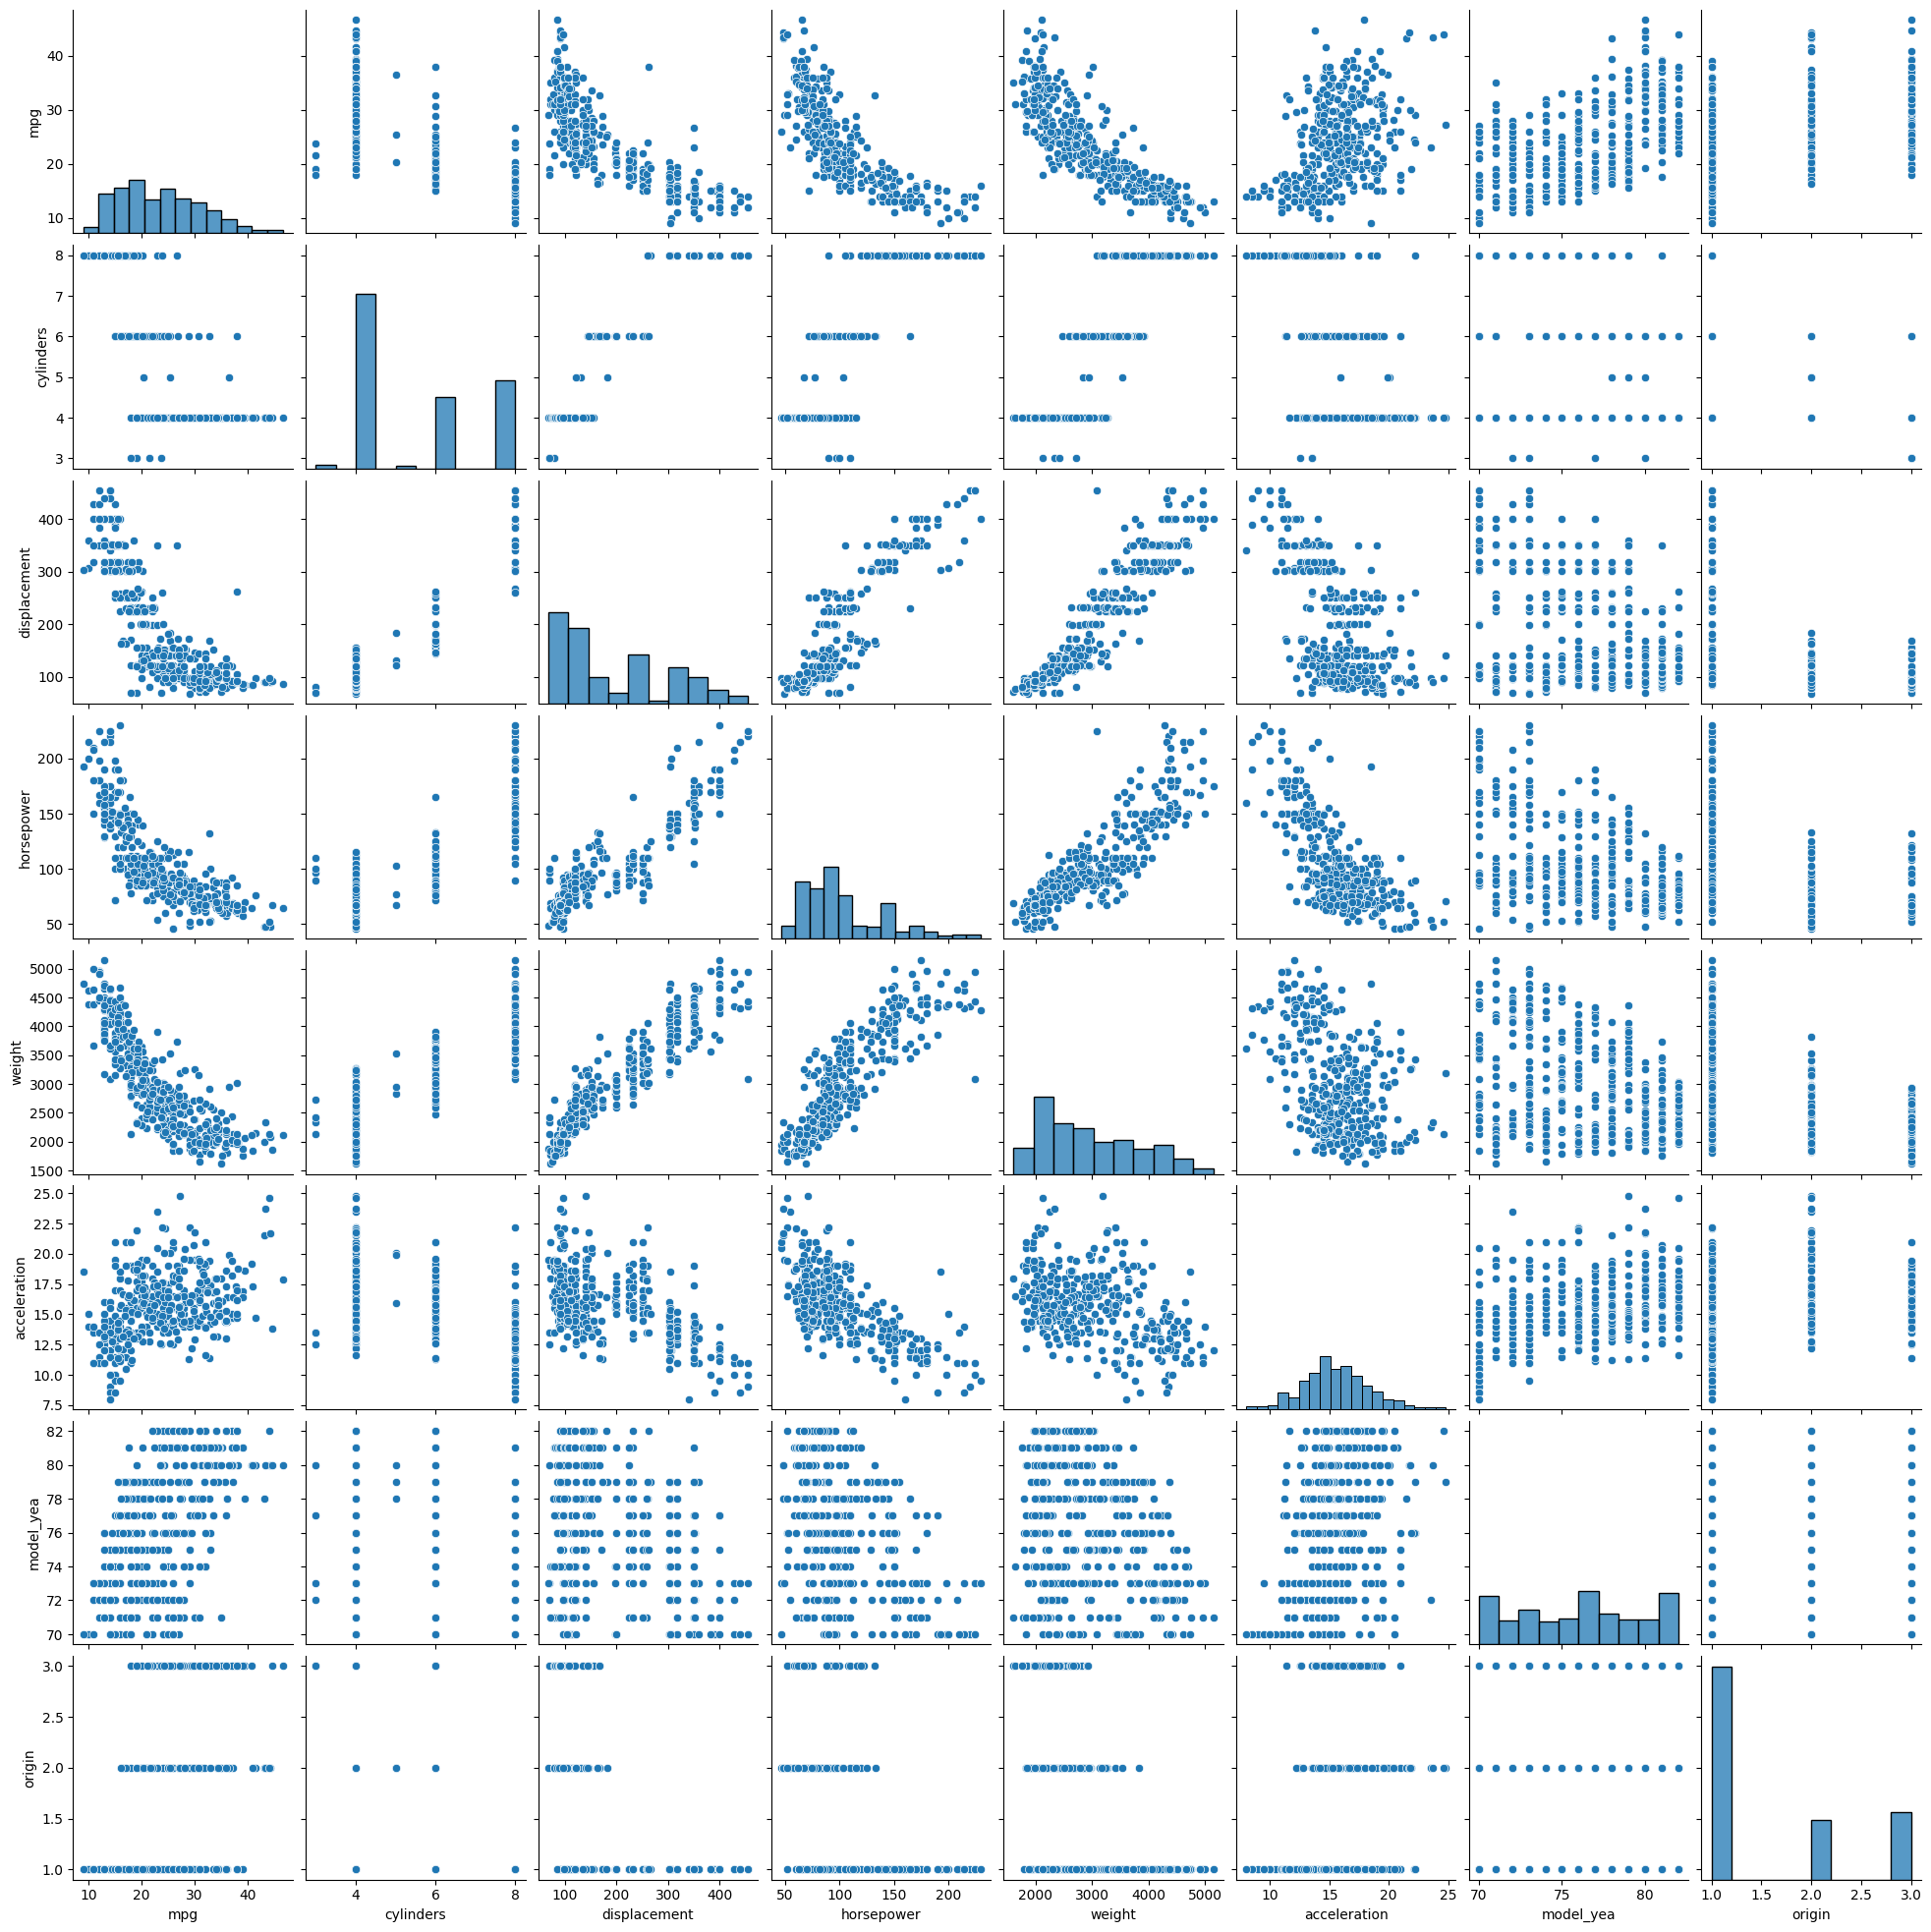

In [ ]:
sns.pairplot(df) # 상관관계 많이 띄는 거 확인 가능

In [ ]:
df["origin"].unique()

array([1, 3, 2])

In [ ]:
df["origin"].value_counts().sort_index()

,count
origin,
1,249
2,70
3,79


##데이터 분리

In [ ]:
df.shape

(398, 9)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.2,shuffle=True,random_state=SEED) # 튜플

train.shape, test.shape

((318, 9), (80, 9))

In [ ]:
train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_yea,origin,car_name
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
18,27.0,4,97.0,88.0,2130.0,14.5,70,3,datsun pl510
376,37.0,4,91.0,68.0,2025.0,18.2,82,3,mazda glc custom l
248,36.1,4,91.0,60.0,1800.0,16.4,78,3,honda civic cvcc
177,23.0,4,115.0,95.0,2694.0,15.0,75,2,audi 100ls


In [ ]:
X_train = train.drop(["car_name","mpg"],axis=1)
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_yea,origin
3,8,304.0,150.0,3433.0,12.0,70,1
18,4,97.0,88.0,2130.0,14.5,70,3
376,4,91.0,68.0,2025.0,18.2,82,3
248,4,91.0,60.0,1800.0,16.4,78,3
177,4,115.0,95.0,2694.0,15.0,75,2


In [ ]:
y_train = train["mpg"]
y_train.head()

,mpg
3,16.0
18,27.0
376,37.0
248,36.1
177,23.0


##데이터 전처리

In [ ]:
# 결측치
X_train.isna().sum()

,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_yea,0
origin,0


In [ ]:
X_train.dropna().isna().sum()

,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_yea,0
origin,0


In [ ]:
X_train["horsepower"].mean(), X_train["horsepower"].median()

(np.float64(103.10691823899371), 92.0)

<Axes: xlabel='horsepower', ylabel='Count'>

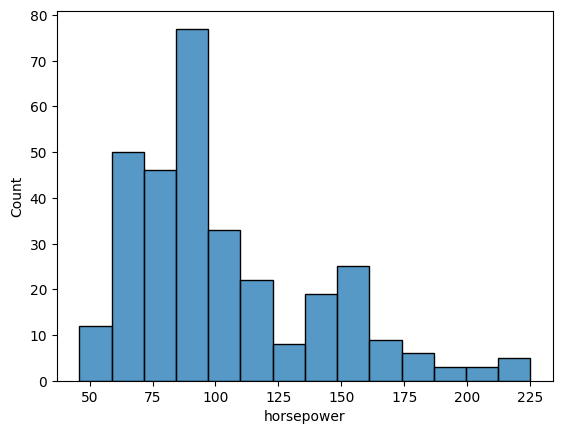

In [ ]:
sns.histplot(X_train["horsepower"])

In [ ]:
horsepower_median = X_train["horsepower"].median()
horsepower_median
X_train["horsepower"] = X_train["horsepower"].fillna(horsepower_median)

In [ ]:
X_train.isna().sum(),X_train.shape

(cylinders       0
 displacement    0
 horsepower      0
 weight          0
 acceleration    0
 model_yea       0
 origin          0
 dtype: int64,
 (318, 7))

##인코딩
- 문자데이터를 숫자로 변환
- 원핫인코딩

In [ ]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_yea,origin
3,8,304.0,150.0,3433.0,12.0,70,1
18,4,97.0,88.0,2130.0,14.5,70,3
376,4,91.0,68.0,2025.0,18.2,82,3
248,4,91.0,60.0,1800.0,16.4,78,3
177,4,115.0,95.0,2694.0,15.0,75,2


## 스케일링
- Standard
- MinMax
- Robust

In [ ]:
mean = np.mean(X_train,axis=0)
mean

,0
cylinders,5.430818
displacement,191.904088
horsepower,103.106918
weight,2969.015723
acceleration,15.639937
model_yea,76.103774
origin,1.591195


In [ ]:
std = np.std(X_train,axis=0)
std

,0
cylinders,1.682296
displacement,102.821750
horsepower,37.033572
weight,839.294963
acceleration,2.758921
model_yea,3.597508
origin,0.810418


In [ ]:
(X_train-mean)/std

,cylinders,displacement,horsepower,weight,acceleration,model_yea,origin
3,1.527188,1.090196,1.266232,0.552826,-1.319334,-1.696667,-0.729494
18,-0.850515,-0.922996,-0.407925,-0.999667,-0.413182,-1.696667,1.738368
376,-0.850515,-0.981350,-0.947975,-1.124772,0.927922,1.638975,1.738368
248,-0.850515,-0.981350,-1.163996,-1.392854,0.275493,0.527094,1.738368
177,-0.850515,-0.747936,-0.218907,-0.327675,-0.231952,-0.306816,0.504437
...,...,...,...,...,...,...,...
71,-1.444941,-1.185587,-0.164902,-0.761372,-0.775643,-1.140727,1.738368
106,1.527188,1.537573,2.076307,1.822940,-1.138103,-0.862757,-0.729494
270,-0.850515,-0.563150,-0.218907,-0.540949,-0.304444,0.527094,1.738368
348,-0.850515,-1.000801,-1.109991,-1.094985,0.601707,1.361005,1.738368


### 스케일러 사용

In [ ]:
from sklearn.preprocessing import StandardScaler

xss = StandardScaler()
#xss.fit(X_train)
#xss.transform(X_train)
X_train_s = xss.fit_transform(X_train)
X_train_s

array([[ 1.5272,  1.0902,  1.2662, ..., -1.3193, -1.6967, -0.7295],
       [-0.8505, -0.923 , -0.4079, ..., -0.4132, -1.6967,  1.7384],
       [-0.8505, -0.9813, -0.948 , ...,  0.9279,  1.639 ,  1.7384],
       ...,
       [-0.8505, -0.5632, -0.2189, ..., -0.3044,  0.5271,  1.7384],
       [-0.8505, -1.0008, -1.11  , ...,  0.6017,  1.361 ,  1.7384],
       [-0.8505, -0.923 , -1.542 , ...,  1.9428, -0.8628,  0.5044]])

In [ ]:
xss.mean_, xss.scale_

(array([5.4308e+00, 1.9190e+02, 1.0311e+02, 2.9690e+03, 1.5640e+01, 7.6104e+01, 1.5912e+00]),
 array([1.6823e+00, 1.0282e+02, 3.7034e+01, 8.3929e+02, 2.7589e+00, 3.5975e+00, 8.1042e-01]))

In [ ]:
y_train

,mpg
3,16.0
18,27.0
376,37.0
248,36.1
177,23.0
...,...
71,19.0
106,12.0
270,21.1
348,37.7


In [ ]:
y_train.to_numpy().reshape(318,1)

array([[16. ],
       [27. ],
       [37. ],
       [36.1],
       [23. ],
       [14. ],
       [32.8],
       [29.9],
       [20. ],
       [12. ],
       [15.5],
       [23.7],
       [24. ],
       [36. ],
       [19. ],
       [38. ],
       [29. ],
       [21.5],
       [27.9],
       [14. ],
       [36.1],
       [22. ],
       [18. ],
       [17. ],
       [18. ],
       [14. ],
       [26. ],
       [13. ],
       [33. ],
       [37. ],
       [32. ],
       [28. ],
       [19.2],
       [32. ],
       [27.4],
       [20. ],
       [26. ],
       [20.6],
       [37.3],
       [16.2],
       [15. ],
       [21. ],
       [21. ],
       [20.5],
       [21. ],
       [25.4],
       [34.1],
       [27. ],
       [36. ],
       [31.6],
       [38.1],
       [32. ],
       [40.8],
       [19. ],
       [20. ],
       [22. ],
       [17.5],
       [35.1],
       [30.5],
       [33.7],
       [19. ],
       [14. ],
       [15.5],
       [15. ],
       [22.5],
       [29. ],
       [23

In [ ]:
yss = StandardScaler()
#yss.fit(y_train)
#yss.transform(y_train)
y_train_s = yss.fit_transform(y_train.to_numpy().reshape(318,1))
y_train_s[:10]

array([[-0.9609],
       [ 0.4284],
       [ 1.6913],
       [ 1.5776],
       [-0.0768],
       [-1.2134],
       [ 1.1609],
       [ 0.7946],
       [-0.4557],
       [-1.466 ]])

In [ ]:
yss.mean_, yss.scale_

(array([23.6082]), array([7.9181]))

#최종 학습데이터

In [ ]:
type(X_train_s), type(y_train_s), X_train_s.shape, y_train_s.shape

(numpy.ndarray, numpy.ndarray, (318, 7), (318, 1))

##모델(베이스라인)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_s,y_train_s)


LinearRegression()

In [ ]:
model.coef_,model.intercept_

(array([[-0.0334,  0.185 , -0.0625, -0.7147,  0.0237,  0.3611,  0.1355]]),
 array([8.3049e-16]))

# 테스트
- X,y 분리
- 결측치
- 인코딩 x
- 스케일링

In [ ]:
test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_yea,origin,car_name
198,33.0,4,91.0,53.0,1795.0,17.4,76,3,honda civic
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
33,19.0,6,232.0,100.0,2634.0,13.0,71,1,amc gremlin
208,13.0,8,318.0,150.0,3940.0,13.2,76,1,plymouth volare premier v8
93,14.0,8,318.0,150.0,4237.0,14.5,73,1,plymouth fury gran sedan


In [ ]:
X_test = test.drop(["car_name","mpg"],axis=1)
y_test = test['mpg']

In [ ]:
# 결측치

X_test.isna().sum()

,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_yea,0
origin,0


In [ ]:
X_test["horsepower"] = X_test["horsepower"].fillna(horsepower_median)

In [ ]:
## 스케일링
X_test_s = xss.transform(X_test)
X_test_s[:10]

array([[-0.8505, -0.9813, -1.353 , -1.3988,  0.638 , -0.0288,  1.7384],
       [-0.8505, -0.6993, -0.6509, -0.4099,  1.0729,  1.639 , -0.7295],
       [ 0.3383,  0.39  , -0.0839, -0.3992, -0.9569, -1.4187, -0.7295],
       [ 1.5272,  1.2264,  1.2662,  1.1569, -0.8844, -0.0288, -0.7295],
       [ 1.5272,  1.2264,  1.2662,  1.5108, -0.4132, -0.8628, -0.7295],
       [-0.8505, -0.923 , -0.4079, -1.0354,  0.3117, -1.1407,  1.7384],
       [-0.8505, -0.5048, -0.2999, -0.1239,  0.2755,  1.639 , -0.7295],
       [ 1.5272,  2.4129,  3.0214,  2.1041, -1.6818, -0.8628, -0.7295],
       [ 1.5272,  0.6623,  0.1861,  1.2999,  1.2179,  0.2491, -0.7295],
       [ 0.3383,  0.0787, -0.2999, -0.112 ,  0.493 , -0.5848, -0.7295]])

In [ ]:
y_test_s = yss.transform(y_test.to_numpy().reshape(-1,1)).reshape(-1)
y_test_s[:10]

array([ 1.1861,  0.5547, -0.582 , -1.3397, -1.2134,  0.4284,  0.0495, -1.3397, -0.8346, -0.3294])

In [ ]:
y_test_s

array([ 1.1861,  0.5547, -0.582 , -1.3397, -1.2134,  0.4284,  0.0495, -1.3397, -0.8346, -0.3294, -1.0872,  1.8176,  0.3021, -1.0872,  0.1758, -1.466 ,  0.9335, -0.8346, -0.9609,  0.9335, -0.2031,
       -0.2031, -0.2031,  1.2493, -0.7083,  2.5753,  0.3021,  0.1126, -0.6956, -1.466 ,  0.4284,  1.565 , -0.0768,  0.0495,  1.7166, -0.9609, -0.3294, -0.5567, -0.9609,  0.6809,  0.4031,  0.4284,
       -0.7083, -1.7186, -0.0768,  1.565 ,  0.3021,  0.1758,  0.1758,  0.1758, -0.2031,  1.325 ,  1.1103, -1.3397, -0.0137, -1.2134, -0.6451,  0.782 ,  0.5547, -0.582 , -1.5923,  1.1861, -0.0768,
       -0.3294, -0.0768,  0.1758,  0.0242,  1.3629,  0.1126, -1.3397,  1.4008, -1.2134, -1.0872, -0.7083,  0.1758, -0.4683, -0.7714,  0.5547,  0.6809, -0.8346])

최종 테스트 데이터

In [ ]:
type(X_test_s), type(y_test_s), X_test_s.shape, y_test_s.shapeㅁ

(numpy.ndarray, numpy.ndarray, (80, 7), (80,))

In [ ]:
y_pred_s = model.predict(X_test_s)
y_pred_s[:10]

array([[ 1.1714],
       [ 0.751 ],
       [-0.2824],
       [-0.8603],
       [-1.4032],
       [ 0.4542],
       [ 0.5418],
       [-1.7475],
       [-0.8492],
       [-0.1963]])

In [ ]:
y_test_s[:10]

array([ 1.1861,  0.5547, -0.582 , -1.3397, -1.2134,  0.4284,  0.0495, -1.3397, -0.8346, -0.3294])

In [ ]:
# 역변환

y_pred = yss.inverse_transform(y_pred_s.reshape(-1,1)).reshape(-1)
y_pred[:10]

array([32.8837, 29.5546, 21.3719, 16.7963, 12.4978, 27.2047, 27.898 ,  9.7717, 16.8844, 22.0541])

In [ ]:
y_test.to_numpy()[:10]

array([33., 28., 19., 13., 14., 27., 24., 13., 17., 21.])

#평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
def print_metrics(y_true,y_pred):
  mse = mean_squared_error(y_true,y_pred)
  r2 = r2_score(y_true,y_pred)
  print(f"MSE : {mse}, R2: {r2}")
print_metrics(y_test,y_pred)

MSE : 8.198150989555169, R2: 0.8475229080116505


#Lidge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_s,y_train_s)

Ridge()

In [ ]:
y_pred_s = ridge.predict(X_test_s)
y_pred = yss.inverse_transform(y_pred_s.reshape(-1,1)).reshape(-1)

In [ ]:
print_metrics(y_test,y_pred)

MSE : 8.208148471175729, R2: 0.8473369652391092


#Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_s,y_train_s)

Lasso()

In [ ]:
y_pred_s = lasso.predict(X_test_s)
y_pred = yss.inverse_transform(y_pred_s.reshape(-1,1)).reshape(-1)

In [ ]:
print_metrics(y_test,y_pred)

MSE : 53.98329798069697, R2: -0.00403326341807686


#모델 저장

In [ ]:
import pickle

data_to_save = {
    "name":"linear regression, auto-mpg",
    "horsepower_median": horsepower_median,
    "xscaler":xss,
    "yscaler":yss
}

In [ ]:
filename = "lr_autompg.pkl"

with open(filename,"wb") as file:
  pickle.dump(data_to_save,file)

# 모델 사용

In [ ]:
with open(filename,"rb") as file:
  loaded_data = pickle.load(file)



In [ ]:
loaded_data

{'name': 'linear regression, auto-mpg',
 'horsepower_median': 92.0,
 'xscaler': StandardScaler(),
 'yscaler': StandardScaler()}

In [ ]:
loaded_data['horsepower_median']

92.0

In [ ]:
loaded_data['xscaler']

StandardScaler()